# Binary Classification - Credit Approval

Dataset:
https://archive.ics.uci.edu/ml/datasets/Credit+Approval

## Dataset observations

https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.names

- Class distribution is quite balanced
- Columns are anonymized
- There are missing values

## Workflow

Data Gathering
1. read_csv

Data Transformation
2. transform dataframe
3. PCA to plot (for classification)
4. train-test split
5. scale

Training
6. logistic regression
7. SGD logistic regression

Validation
8. metrics
9. learning curve
10. prediction

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import learning_curve

## Data Gathering

1. read_csv

In [3]:
df = pd.read_csv('d:/tmp/credit-approval/crx.data',
                names=['A1', 'A2', 'A3', 'A4', 'A5', 'A6',
                      'A7', 'A8', 'A9', 'A10', 'A11', 'A12',
                      'A13', 'A14', 'A15', 'y'],
                na_values=['?', 'nan'])
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,y
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


## Data Transformation
2. transform dataframe
3. PCA to plot (for classification)
4. train-test split
5. scale

2. transform dataframe
  - change to numeric types
  - handle NaN values

In [ ]:
df.dtypes

In [ ]:
df.A1.unique()

In [ ]:
df.A4.unique()

In [4]:
# let's try one-hot encoding
columns_to_encode = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']
np.testing.assert_array_equal(columns_to_encode, df.loc[:, columns_to_encode].columns)

dummies = pd.get_dummies(df.loc[:, columns_to_encode])
dummies.columns

Index(['A1_a', 'A1_b', 'A4_l', 'A4_u', 'A4_y', 'A5_g', 'A5_gg', 'A5_p',
       'A6_aa', 'A6_c', 'A6_cc', 'A6_d', 'A6_e', 'A6_ff', 'A6_i', 'A6_j',
       'A6_k', 'A6_m', 'A6_q', 'A6_r', 'A6_w', 'A6_x', 'A7_bb', 'A7_dd',
       'A7_ff', 'A7_h', 'A7_j', 'A7_n', 'A7_o', 'A7_v', 'A7_z', 'A9_f', 'A9_t',
       'A10_f', 'A10_t', 'A12_f', 'A12_t', 'A13_g', 'A13_p', 'A13_s'],
      dtype='object')

In [5]:
df_1 = pd.concat([df, dummies], axis=1)
df_1.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'y', 'A1_a', 'A1_b', 'A4_l', 'A4_u', 'A4_y',
       'A5_g', 'A5_gg', 'A5_p', 'A6_aa', 'A6_c', 'A6_cc', 'A6_d', 'A6_e',
       'A6_ff', 'A6_i', 'A6_j', 'A6_k', 'A6_m', 'A6_q', 'A6_r', 'A6_w', 'A6_x',
       'A7_bb', 'A7_dd', 'A7_ff', 'A7_h', 'A7_j', 'A7_n', 'A7_o', 'A7_v',
       'A7_z', 'A9_f', 'A9_t', 'A10_f', 'A10_t', 'A12_f', 'A12_t', 'A13_g',
       'A13_p', 'A13_s'],
      dtype='object')

In [6]:
# let's clean up some columns
df_1.drop(columns_to_encode, axis=1, inplace=True)
df_1.columns

Index(['A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'y', 'A1_a', 'A1_b', 'A4_l',
       'A4_u', 'A4_y', 'A5_g', 'A5_gg', 'A5_p', 'A6_aa', 'A6_c', 'A6_cc',
       'A6_d', 'A6_e', 'A6_ff', 'A6_i', 'A6_j', 'A6_k', 'A6_m', 'A6_q', 'A6_r',
       'A6_w', 'A6_x', 'A7_bb', 'A7_dd', 'A7_ff', 'A7_h', 'A7_j', 'A7_n',
       'A7_o', 'A7_v', 'A7_z', 'A9_f', 'A9_t', 'A10_f', 'A10_t', 'A12_f',
       'A12_t', 'A13_g', 'A13_p', 'A13_s'],
      dtype='object')

In [7]:
# now check to make sure dtypes are all numeric
df_1.dtypes

A2       float64
A3       float64
A8       float64
A11        int64
A14      float64
A15        int64
y         object
A1_a       uint8
A1_b       uint8
A4_l       uint8
A4_u       uint8
A4_y       uint8
A5_g       uint8
A5_gg      uint8
A5_p       uint8
A6_aa      uint8
A6_c       uint8
A6_cc      uint8
A6_d       uint8
A6_e       uint8
A6_ff      uint8
A6_i       uint8
A6_j       uint8
A6_k       uint8
A6_m       uint8
A6_q       uint8
A6_r       uint8
A6_w       uint8
A6_x       uint8
A7_bb      uint8
A7_dd      uint8
A7_ff      uint8
A7_h       uint8
A7_j       uint8
A7_n       uint8
A7_o       uint8
A7_v       uint8
A7_z       uint8
A9_f       uint8
A9_t       uint8
A10_f      uint8
A10_t      uint8
A12_f      uint8
A12_t      uint8
A13_g      uint8
A13_p      uint8
A13_s      uint8
dtype: object

In [8]:
# the last one we deal with is class
# since this is the classification output, the convention is to use 1, 0
df_1.y.unique()

array(['+', '-'], dtype=object)

In [27]:
# We can use sklearn.preprocessing.LabelEncoder, but that doesn't give us the
# ability to assign labels to numbers. For example, if we want '+' to be 1,
# and '-' to be 0. This is because LabelEncoder picks the first class it encounters
# and assigned the number accordingly.

y_enc = df_1.y.map({'+': 1, '-': 0})
y_enc

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
660    0
661    0
662    0
663    0
664    0
665    0
666    0
667    0
668    0
669    0
670    0
671    0
672    0
673    0
674    0
675    0
676    0
677    0
678    0
679    0
680    0
681    0
682    0
683    0
684    0
685    0
686    0
687    0
688    0
689    0
Name: y, Length: 690, dtype: int64

In [36]:
df_1.drop(['y'], axis=1, inplace=True) # drop the original y column
df_2 = pd.concat([df_1, y_enc], axis=1) # add the encoded y column
df_2.columns

Index(['A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'A1_a', 'A1_b', 'A4_l', 'A4_u',
       'A4_y', 'A5_g', 'A5_gg', 'A5_p', 'A6_aa', 'A6_c', 'A6_cc', 'A6_d',
       'A6_e', 'A6_ff', 'A6_i', 'A6_j', 'A6_k', 'A6_m', 'A6_q', 'A6_r', 'A6_w',
       'A6_x', 'A7_bb', 'A7_dd', 'A7_ff', 'A7_h', 'A7_j', 'A7_n', 'A7_o',
       'A7_v', 'A7_z', 'A9_f', 'A9_t', 'A10_f', 'A10_t', 'A12_f', 'A12_t',
       'A13_g', 'A13_p', 'A13_s', 'y'],
      dtype='object')

In [37]:
df_2.dtypes

A2       float64
A3       float64
A8       float64
A11        int64
A14      float64
A15        int64
A1_a       uint8
A1_b       uint8
A4_l       uint8
A4_u       uint8
A4_y       uint8
A5_g       uint8
A5_gg      uint8
A5_p       uint8
A6_aa      uint8
A6_c       uint8
A6_cc      uint8
A6_d       uint8
A6_e       uint8
A6_ff      uint8
A6_i       uint8
A6_j       uint8
A6_k       uint8
A6_m       uint8
A6_q       uint8
A6_r       uint8
A6_w       uint8
A6_x       uint8
A7_bb      uint8
A7_dd      uint8
A7_ff      uint8
A7_h       uint8
A7_j       uint8
A7_n       uint8
A7_o       uint8
A7_v       uint8
A7_z       uint8
A9_f       uint8
A9_t       uint8
A10_f      uint8
A10_t      uint8
A12_f      uint8
A12_t      uint8
A13_g      uint8
A13_p      uint8
A13_s      uint8
y          int64
dtype: object

In [39]:
# Count the number of NaN values per column
# len() returns total number of rows
# .count() returns number of valid (non-NaN) values
len(df_2) - df_2.count()

A2       12
A3        0
A8        0
A11       0
A14      13
A15       0
A1_a      0
A1_b      0
A4_l      0
A4_u      0
A4_y      0
A5_g      0
A5_gg     0
A5_p      0
A6_aa     0
A6_c      0
A6_cc     0
A6_d      0
A6_e      0
A6_ff     0
A6_i      0
A6_j      0
A6_k      0
A6_m      0
A6_q      0
A6_r      0
A6_w      0
A6_x      0
A7_bb     0
A7_dd     0
A7_ff     0
A7_h      0
A7_j      0
A7_n      0
A7_o      0
A7_v      0
A7_z      0
A9_f      0
A9_t      0
A10_f     0
A10_t     0
A12_f     0
A12_t     0
A13_g     0
A13_p     0
A13_s     0
y         0
dtype: int64

In [42]:
# since we cannot interpolate the values, we'll drop them
df_2.dropna(inplace=True)
df_2.describe()

,A2,A3,A8,A11,A14,A15,A1_a,A1_b,A4_l,A4_u,...,A9_f,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s,y
count,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,...,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000
mean,31.569054,4.798078,2.222320,2.459459,182.115616,998.584084,0.304805,0.677177,0.003003,0.762763,...,0.471471,0.528529,0.564565,0.435435,0.539039,0.460961,0.914414,0.003003,0.082583,0.448949
std,11.920174,5.005309,3.347599,4.929794,171.477919,5202.975198,0.460671,0.467907,0.054758,0.425709,...,0.499561,0.499561,0.496187,0.496187,0.498848,0.498848,0.279961,0.054758,0.275457,0.497761
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.602500,1.010000,0.165000,0.000000,75.250000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,28.500000,2.750000,1.000000,0.000000,160.000000,5.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,38.250000,7.207500,2.585000,3.000000,271.000000,399.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,80.250000,28.000000,28.500000,67.000000,2000.000000,100000.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


2. PCA to plot (for classification)

  - Plot a scatter plot with 2 feature dimensions (or 3 feature dimensions)  
  - Use colours for y_enc

In [43]:
pca = PCA(n_components=3)

X = df_2.loc[:, 'A2':'A13_s']
y = df_2.y

X.columns

Index(['A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'A1_a', 'A1_b', 'A4_l', 'A4_u',
       'A4_y', 'A5_g', 'A5_gg', 'A5_p', 'A6_aa', 'A6_c', 'A6_cc', 'A6_d',
       'A6_e', 'A6_ff', 'A6_i', 'A6_j', 'A6_k', 'A6_m', 'A6_q', 'A6_r', 'A6_w',
       'A6_x', 'A7_bb', 'A7_dd', 'A7_ff', 'A7_h', 'A7_j', 'A7_n', 'A7_o',
       'A7_v', 'A7_z', 'A9_f', 'A9_t', 'A10_f', 'A10_t', 'A12_f', 'A12_t',
       'A13_g', 'A13_p', 'A13_s'],
      dtype='object')

In [44]:
X_3d = pca.fit_transform(X)
print('Before:', X.shape, 'After:', X_3d.shape)

Before: (666, 46) After: (666, 3)


<IPython.core.display.Javascript object>


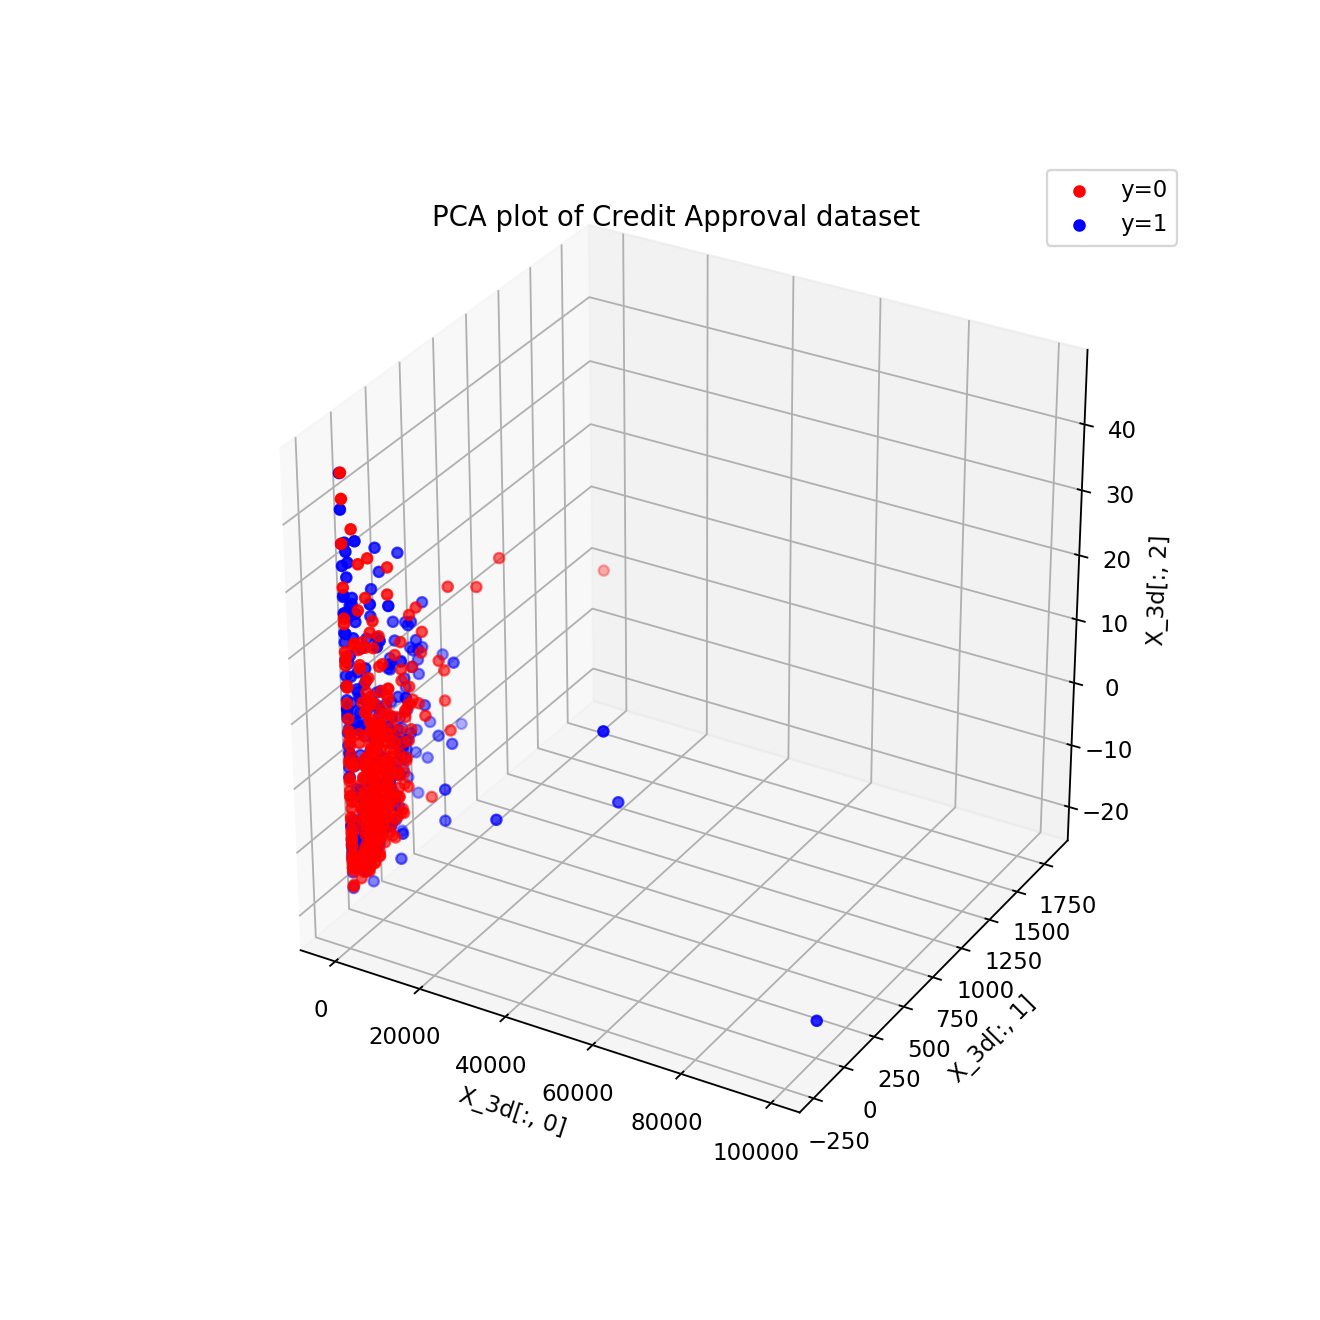

In [45]:
# A better tutorial:
# https://matplotlib.org/gallery/mplot3d/scatter3d.html

# interactive plot
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_3d[y==0, 0], X_3d[y==0, 1], X_3d[y==0, 2], color='r', label='y=0')
ax.scatter(X_3d[y==1, 0], X_3d[y==1, 1], X_3d[y==1, 2], color='b', label='y=1')
ax.set(xlabel='X_3d[:, 0]', ylabel='X_3d[:, 1]', zlabel='X_3d[:, 2]',
       title='PCA plot of Credit Approval dataset')
ax.legend()

The plot looks squished, let's try scaling the features first to see if we get a better view.

<IPython.core.display.Javascript object>


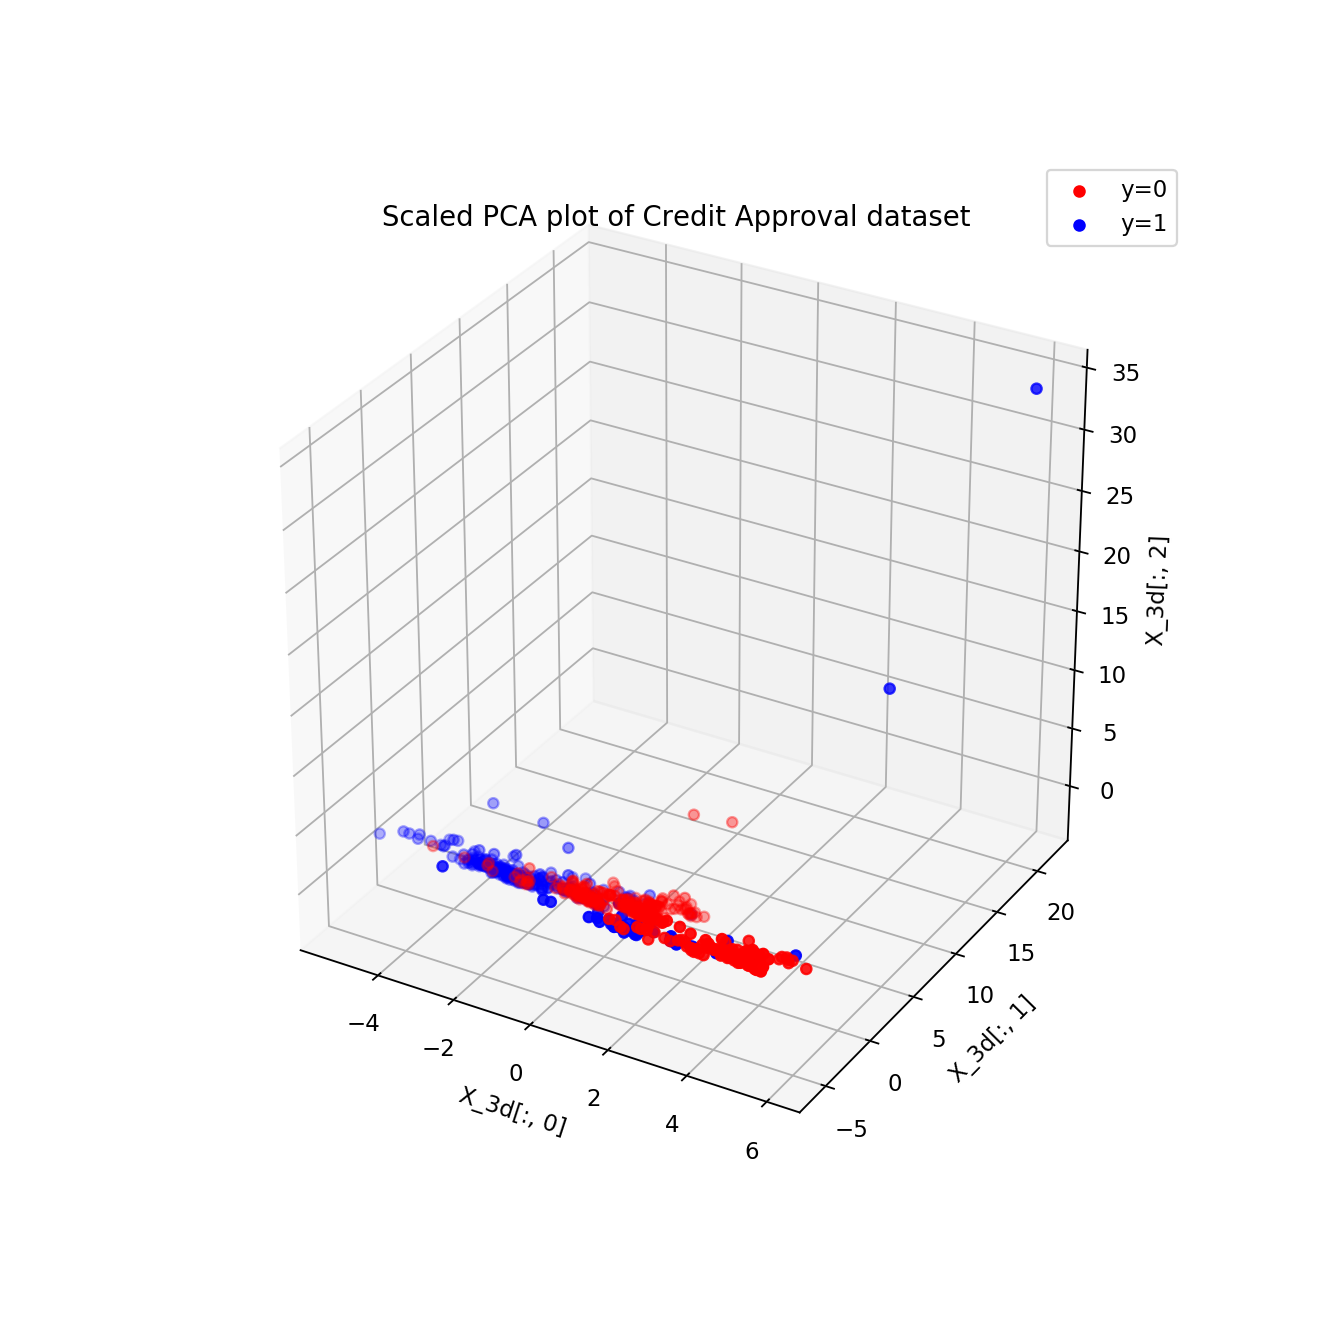

In [47]:
# we are plotting all the datapoints, so we want to fit to the whole dataset
# during training/testing, we'll still fit separately.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=3)
X_3d = pca.fit_transform(X_scaled)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_3d[y==0, 0], X_3d[y==0, 1], X_3d[y==0, 2], color='r', label='y=0')
ax.scatter(X_3d[y==1, 0], X_3d[y==1, 1], X_3d[y==1, 2], color='b', label='y=1')
ax.set(xlabel='X_3d[:, 0]', ylabel='X_3d[:, 1]', zlabel='X_3d[:, 2]',
       title='Scaled PCA plot of Credit Approval dataset')
ax.legend()

Okay, lastly, let's try a 2D plot.

<IPython.core.display.Javascript object>


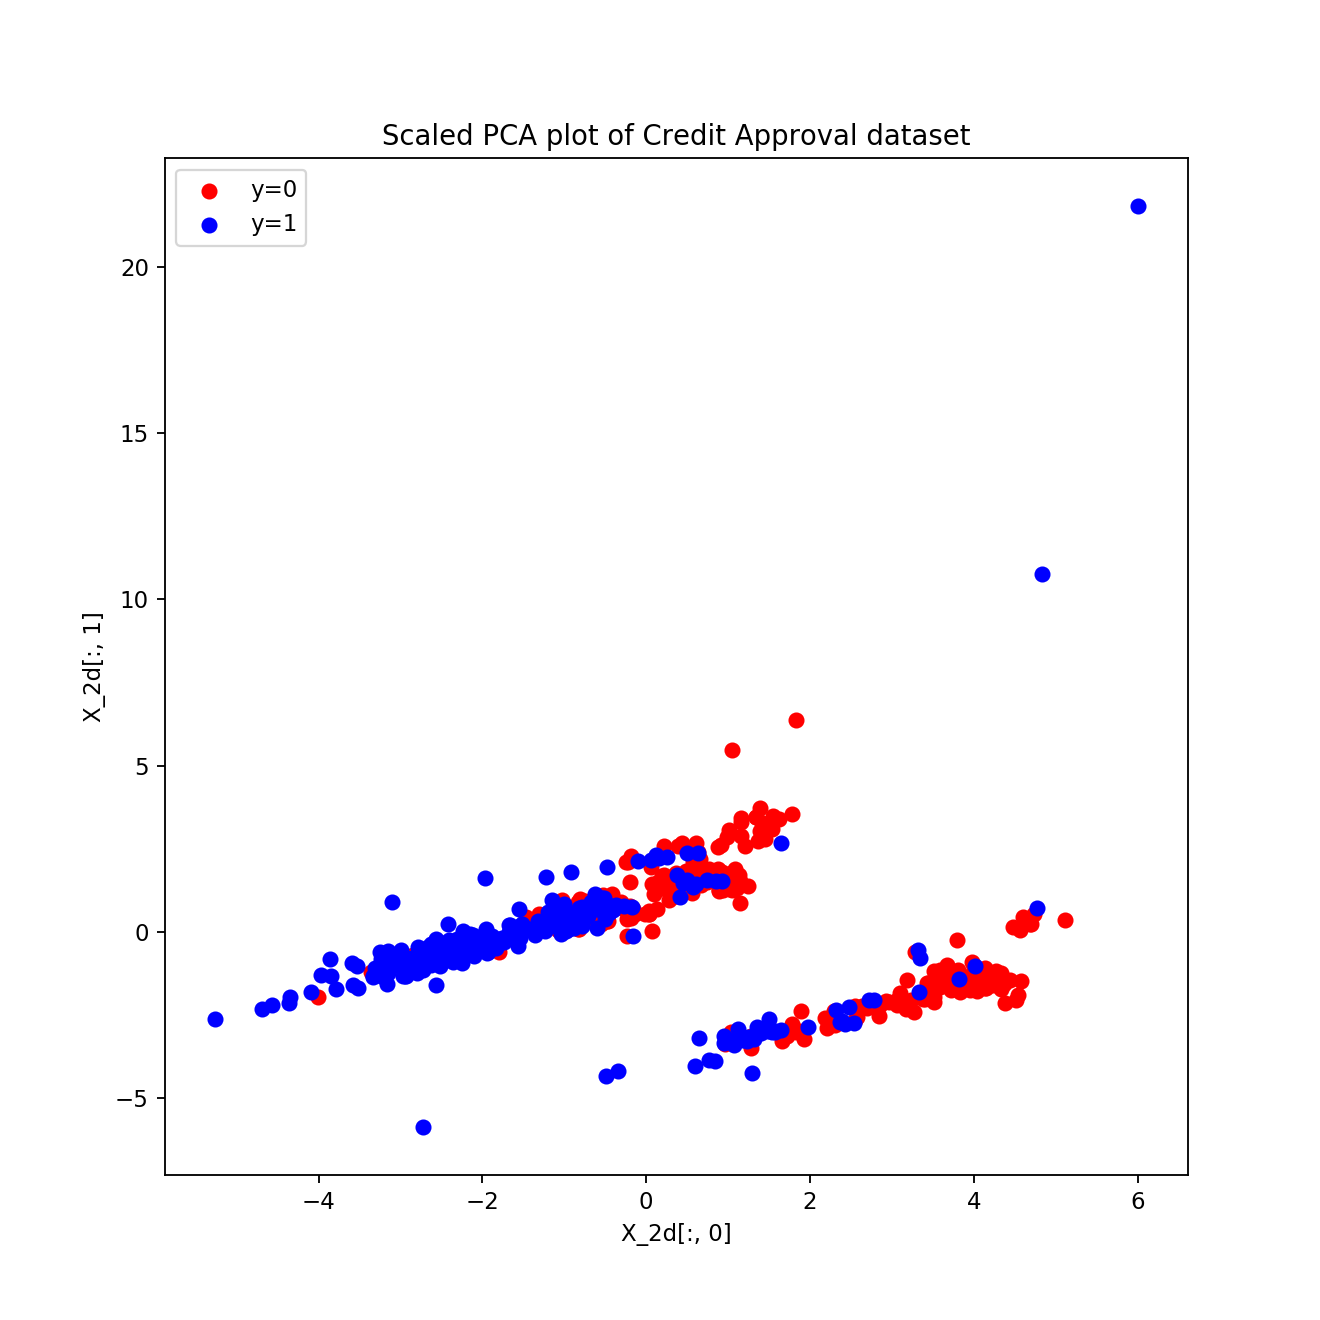

In [48]:
# we are plotting all the datapoints, so we want to fit to the whole dataset
# during training/testing, we'll still fit separately.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

ax.scatter(X_2d[y==0, 0], X_2d[y==0, 1], color='r', label='y=0')
ax.scatter(X_2d[y==1, 0], X_2d[y==1, 1], color='b', label='y=1')
ax.set(xlabel='X_2d[:, 0]', ylabel='X_2d[:, 1]',
       title='Scaled PCA plot of Credit Approval dataset')
ax.legend()

As you can see above, visualization is also iterative. 

4. train-test split

In [58]:
# we'll split the unscaled features
# then scale them using just the mean & variance of the training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=42)

5. scale

In [59]:
X_scaler = StandardScaler()
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# note that you don't scale y. It's a class output, which has only individual (discrete)
# values such as 0 vs 1.

## Training
6. logistic regression
7. SGD logistic regression

In [66]:
logistic = LogisticRegression(random_state=42)
logistic.fit(X_train_scaled, y_train)
y_pred_logistic = logistic.predict(X_test_scaled)

In [67]:
sgd = SGDClassifier(tol=1e-4, max_iter=1000, verbose=True, random_state=42)
sgd.fit(X_train_scaled, y_train)
y_pred_sgd = sgd.predict(X_test_scaled)

-- Epoch 1
Norm: 278.59, NNZs: 46, Bias: 7.656283, T: 599, Avg. loss: 40.647386
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 216.52, NNZs: 46, Bias: -41.208089, T: 1198, Avg. loss: 21.242321
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 179.98, NNZs: 46, Bias: -10.807232, T: 1797, Avg. loss: 16.583356
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 153.02, NNZs: 46, Bias: -15.625630, T: 2396, Avg. loss: 12.194730
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 141.38, NNZs: 46, Bias: -17.979373, T: 2995, Avg. loss: 11.015642
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 127.32, NNZs: 46, Bias: 5.033645, T: 3594, Avg. loss: 9.068132
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 108.55, NNZs: 46, Bias: -5.616322, T: 4193, Avg. loss: 10.053686
Total training time: 0.00 seconds.
Convergence after 7 epochs took 0.00 seconds


## Validation
8. metrics
9. learning curve
10. prediction

8. metrics

In [68]:
# Classification report. See classification.ipynb for details
print(classification_report(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_sgd))

             precision    recall  f1-score   support

          0       0.78      0.74      0.76        38
          1       0.68      0.72      0.70        29

avg / total       0.73      0.73      0.73        67

             precision    recall  f1-score   support

          0       0.82      0.71      0.76        38
          1       0.68      0.79      0.73        29

avg / total       0.76      0.75      0.75        67



In [69]:
# Confusion matrix. See classification.ipynb for details
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
cm_sgd = confusion_matrix(y_test, y_pred_sgd)

[Text(0,0.5,'Denied'), Text(0,1.5,'Approved')]

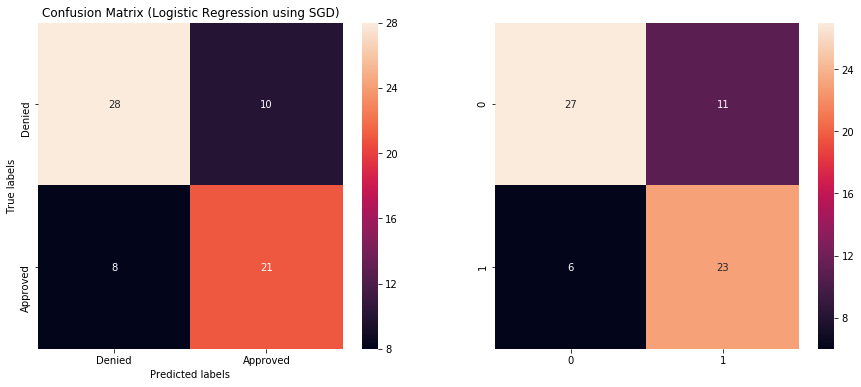

In [76]:
# !conda install -y seaborn

# matplotlib can plot confusion matrices, isn't as easy as seaborn

%matplotlib inline
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
ax = axes.flatten()

# annotate cells with ticks
sns.heatmap(cm_logistic, annot=True, ax=ax[0])
sns.heatmap(cm_sgd, annot=True, ax=ax[1])

ax[0].set(xlabel='Predicted labels', ylabel='True labels', title='Confusion Matrix (Logistic Regression)') 
ax[0].xaxis.set_ticklabels(['Denied', 'Approved'])
ax[0].yaxis.set_ticklabels(['Denied', 'Approved'])

ax[0].set(xlabel='Predicted labels', ylabel='True labels', title='Confusion Matrix (Logistic Regression using SGD)'); 
ax[0].xaxis.set_ticklabels(['Denied', 'Approved'])
ax[0].yaxis.set_ticklabels(['Denied', 'Approved'])

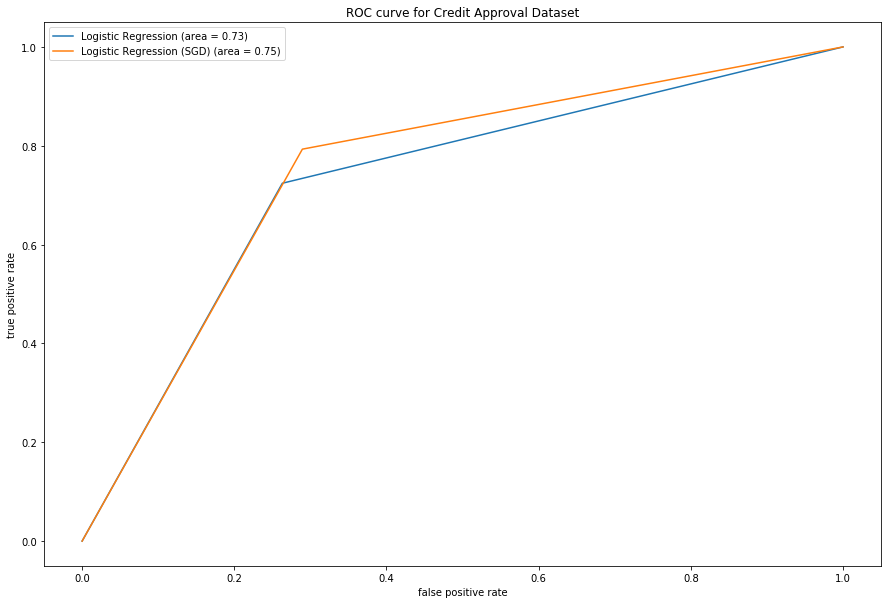

In [93]:
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(fpr_logistic, tpr_logistic)

fpr_sgd, tpr_sgd, _ = roc_curve(y_test, y_pred_sgd)
auc_sgd = auc(fpr_sgd, tpr_sgd)

fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(fpr_logistic, tpr_logistic, label='Logistic Regression (area = %0.2f)' % auc_logistic)
ax.plot(fpr_sgd, tpr_sgd, label='Logistic Regression (SGD) (area = %0.2f)' % auc_sgd)

# bigger area is better
ax.set(xlabel='false positive rate', ylabel='true positive rate', title='ROC curve for Credit Approval Dataset')
ax.legend()
plt.show()

9. learning curve

train_size mean_train_score (3-fold cv) mean_val_score (3-fold cv)
39 0.9658119658119658 0.8497236180904522
129 0.917312661498708 0.8630653266331659
219 0.928462709284627 0.879748743718593
309 0.9190938511326862 0.8764237855946398
399 0.9014202172096909 0.8830988274706867


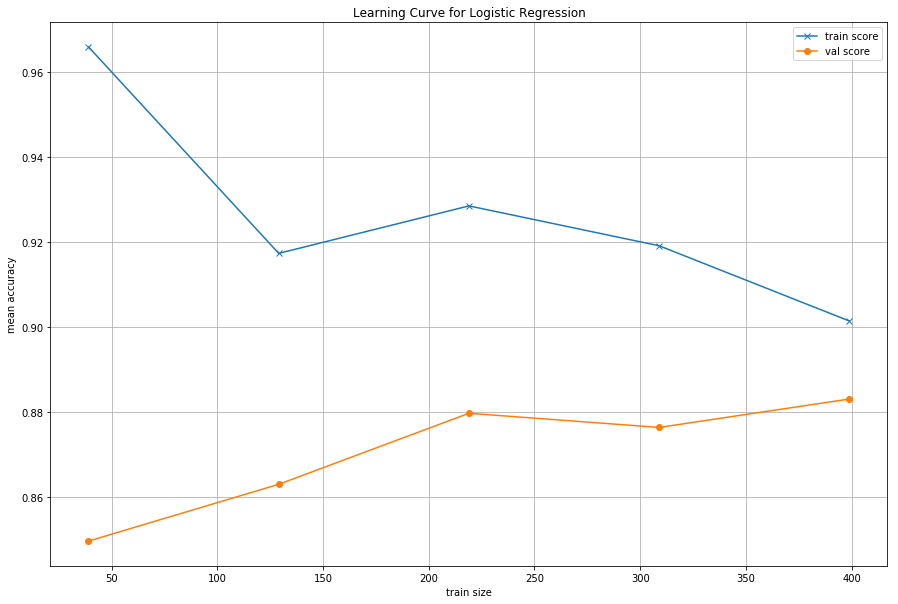

In [82]:
logistic_2 = LogisticRegression(random_state=42)
train_sizes, train_score, val_score = learning_curve(logistic_2, X_train_scaled, y_train)

train_mean = np.mean(train_score, axis=1)
val_mean = np.mean(val_score, axis=1)

print('train_size', 'mean_train_score (3-fold cv)', 'mean_val_score (3-fold cv)')
for train_size, t, m in zip(train_sizes, train_mean, val_mean):
    print(train_size, t, m)

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(train_sizes, train_mean, label='train score', marker='x')
ax.plot(train_sizes, val_mean, label='val score', marker='o')

# LogisticRegression.score() is the mean accuracy
ax.set(xlabel='train size', ylabel='mean accuracy', title='Learning Curve for Logistic Regression')
ax.grid()
ax.legend()
plt.show()    

train_size mean_train_score (3-fold cv) mean_val_score (3-fold cv)
39 0.9316239316239315 0.8430485762144054
129 0.8191214470284237 0.7879229480737018
219 0.8904109589041096 0.8480904522613065
309 0.8813376483279396 0.858073701842546
399 0.8571428571428571 0.8213651591289782


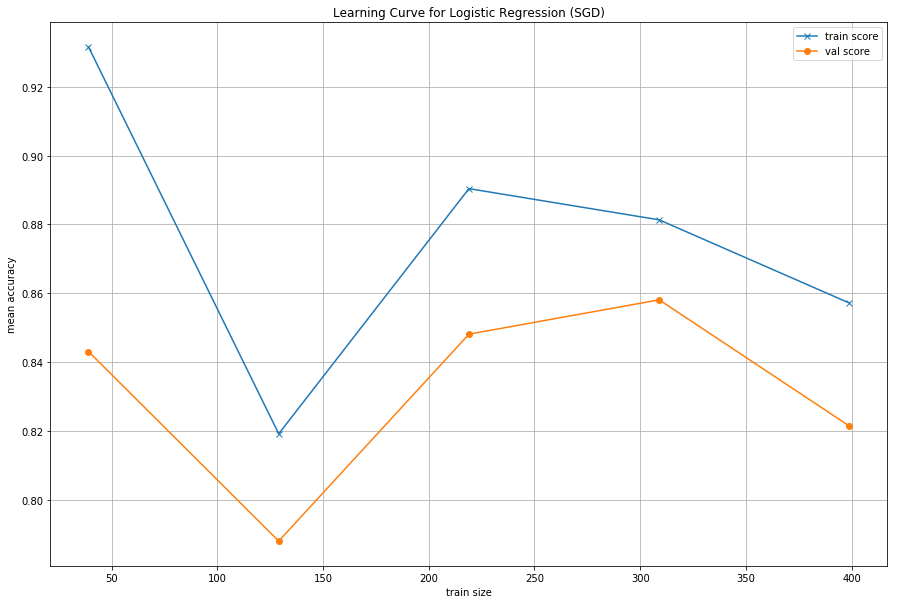

In [84]:
sgd_2 = SGDClassifier(tol=1e-4, max_iter=1000, random_state=42)
train_sizes, train_score, val_score = learning_curve(sgd_2, X_train_scaled, y_train)

train_mean = np.mean(train_score, axis=1)
val_mean = np.mean(val_score, axis=1)

print('train_size', 'mean_train_score (3-fold cv)', 'mean_val_score (3-fold cv)')
for train_size, t, m in zip(train_sizes, train_mean, val_mean):
    print(train_size, t, m)

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(train_sizes, train_mean, label='train score', marker='x')
ax.plot(train_sizes, val_mean, label='val score', marker='o')

# LogisticRegression.score() is the mean accuracy
ax.set(xlabel='train size', ylabel='mean accuracy', title='Learning Curve for Logistic Regression (SGD)')
ax.grid()
ax.legend()
plt.show()    

10. prediction

In [107]:
test = X_test
truth = y_test.values

pred_lr = logistic.predict(test)
pred_sgd = sgd.predict(test)

print('Number of mislabeled points out of %d points:' % test.shape[0])
print('Logistic Regression: %d, Mean Accuracy: %.3f' % ((truth != pred_lr).sum(),
                                              logistic.score(test, truth)))
print('Logistic Regression (SGD): %d, Mean Accuracy: %.3f' % ((truth != pred_sgd).sum(),
                                                            sgd.score(test, truth)))

# print first 10 test datapoints and predictions
print()
print('Truth (1=approved, 0=denied)', truth[:10])
print('Logistic Regression', pred_lr[:10])
print('Logistic Regression with SGD', pred_sgd[:10])

Number of mislabeled points out of 67 points:
Logistic Regression: 26, Mean Accuracy: 0.612
Logistic Regression (SGD): 29, Mean Accuracy: 0.567

Truth (1=approved, 0=denied) [0 1 0 1 0 0 0 0 1 0]
Logistic Regression [1 0 1 0 0 0 0 1 1 1]
Logistic Regression with SGD [1 0 1 1 1 0 0 1 1 1]
